In [1]:
#Name:Glory Ogor
#Student number:501071794


!pip install plotly
!pip install cufflinks
!pip install textblob


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
import nltk
import re
import seaborn as sns
import os
for dirname, _,filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname,filename))



In [27]:
df = pd.read_csv('amazon_alexa.csv', index_col=1)
df.head()

,rating,variation,verified_reviews,feedback
date,,,,
31-Jul-18,5,Charcoal Fabric,Love my Echo!,1
31-Jul-18,5,Charcoal Fabric,Loved it!,1
31-Jul-18,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1
31-Jul-18,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
31-Jul-18,5,Charcoal Fabric,Music,1


In [ ]:
Expolratory data analysis

In [28]:
df.keys()

Index(['rating', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [29]:
df.shape

(3150, 4)

In [30]:
df.info

<bound method DataFrame.info of            rating         variation  \
date                                  
31-Jul-18       5  Charcoal Fabric    
31-Jul-18       5  Charcoal Fabric    
31-Jul-18       4    Walnut Finish    
31-Jul-18       5  Charcoal Fabric    
31-Jul-18       5  Charcoal Fabric    
...           ...               ...   
30-Jul-18       5        Black  Dot   
30-Jul-18       5        Black  Dot   
30-Jul-18       5        Black  Dot   
30-Jul-18       5        White  Dot   
29-Jul-18       4        Black  Dot   

                                            verified_reviews  feedback  
date                                                                    
31-Jul-18                                      Love my Echo!         1  
31-Jul-18                                          Loved it!         1  
31-Jul-18  Sometimes while playing a game, you can answer...         1  
31-Jul-18  I have had a lot of fun with this thing. My 4 ...         1  
31-Jul-18             

In [32]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [33]:
#3. Are there any missing values in the dataset?
df.isnull().sum()
#wine_data_all.isnull().sum()

rating              0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [35]:
df.values

array([[5, 'Charcoal Fabric ', 'Love my Echo!', 1],
       [5, 'Charcoal Fabric ', 'Loved it!', 1],
       [4, 'Walnut Finish ',
        'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.',
        1],
       ...,
       [5, 'Black  Dot',
        'I do love these things, i have them running my entire home, TV, all my lights, my thermostat, my front door dead bolt, the cameras... and i love listening to npr. these things are well worth the value and they really shine once you stat adding smart devices and you can control your entire home like its right out of star trek.... I named mine computer to get the feel... but its amazing what you can do with these devices and smart systems.',
        1],
       [5, 'White  Dot',
        "Only complaint I have is that the sound quality isn't great. I mostly use it for commands though, and I have another

In [36]:
df['lenght'] = df['verified_reviews'].apply(len)
df.groupby('lenght').describe().sample(10)


rating                                                feedback  \
        count      mean       std  min   25%  50%   75%  max    count   
lenght                                                                  
402       1.0  1.000000       NaN  1.0  1.00  1.0  1.00  1.0      1.0   
135       7.0  4.571429  1.133893  2.0  5.00  5.0  5.00  5.0      7.0   
483       2.0  5.000000  0.000000  5.0  5.00  5.0  5.00  5.0      2.0   
155       5.0  5.000000  0.000000  5.0  5.00  5.0  5.00  5.0      5.0   
158       2.0  4.500000  0.707107  4.0  4.25  4.5  4.75  5.0      2.0   
116      10.0  4.100000  1.523884  1.0  3.50  5.0  5.00  5.0     10.0   
429       4.0  5.000000  0.000000  5.0  5.00  5.0  5.00  5.0      4.0   
57       12.0  4.666667  1.154701  1.0  5.00  5.0  5.00  5.0     12.0   
51       19.0  4.263158  1.194529  1.0  4.00  5.0  5.00  5.0     19.0   
789       1.0  4.000000       NaN  4.0  4.00  4.0  4.00  4.0      1.0   

                                                     
            mean       std  min  25%  50%  75%  max  
lenght                                               
402     0.000000       NaN  0.0  0.0  0.0  0.0  0.0  
135     0.857143  0.377964  0.0  1.0  1.0  1.0  1.0  
483     1.000000  0.000000  1.0  1.0  1.0  1.0  1.0  
155     1.000000  0.000000  1.0  1.0  1.0  1.0  1.0  
158     1.000000  0.000000  1.0  1.0  1.0  1.0  1.0  
116     0.800000  0.421637  0.0  1.0  1.0  1.0  1.0  
429     1.000000  0.000000  1.0  1.0  1.0  1.0  1.0  
57      0.916667  0.288675  0.0  1.0  1.0  1.0  1.0  
51      0.894737  0.315302  0.0  1.0  1.0  1.0  1.0  
789     1.000000       NaN  1.0  1.0  1.0  1.0  1.0

In [38]:
df.groupby('rating').describe()

feedback                                     lenght              \
          count mean  std  min  25%  50%  75%  max   count        mean   
rating                                                                   
1         161.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   161.0  195.000000   
2          96.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    96.0  249.187500   
3         152.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   152.0  207.296053   
4         455.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   455.0  178.520879   
5        2286.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  2286.0  108.444007   

                                                       
               std  min    25%    50%     75%     max  
rating                                                 
1       212.371226  1.0  36.00  120.0  284.00  1124.0  
2       269.595303  1.0  78.75  163.0  309.25  1686.0  
3       272.194706  1.0  54.00  130.0  284.00  1954.0  
4       215.927849  1.0  34.00   99.0  241.00  1360.0  
5       152.116387  1.0  26.00   64.0  135.00  2851.0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3150 entries, 5 to 4
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              3150 non-null   object
 1   variation         3150 non-null   object
 2   verified_reviews  3150 non-null   object
 3   feedback          3150 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 123.0+ KB


In [39]:
df['rating'].value_counts()

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

<AxesSubplot:>

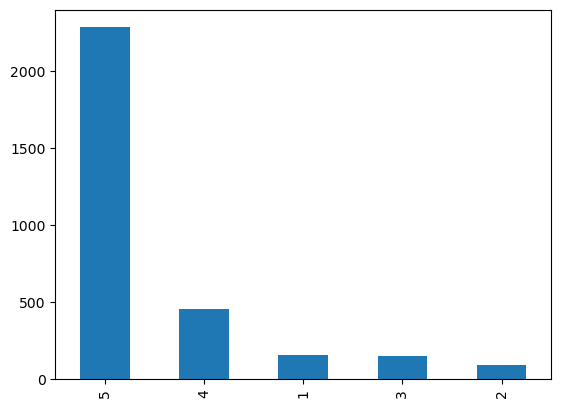

In [41]:
df['rating'].value_counts().plot.bar()

In [42]:
#describe data by feedback
df.groupby('feedback').describe()

rating                                               lenght  \
           count      mean       std  min  25%  50%  75%  max   count   
feedback                                                                
0          257.0  1.373541  0.484688  1.0  1.0  1.0  2.0  2.0   257.0   
1         2893.0  4.737643  0.546544  3.0  5.0  5.0  5.0  5.0  2893.0   

                                                                   
                mean         std  min   25%    50%    75%     max  
feedback                                                           
0         215.241245  236.325955  1.0  53.0  137.0  289.0  1686.0  
1         124.659177  174.624491  1.0  29.0   69.0  154.0  2851.0

<function matplotlib.pyplot.show(close=None, block=None)>

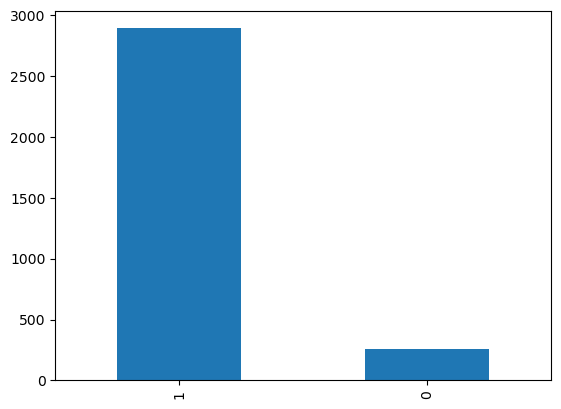

In [44]:
df['feedback'].value_counts().plot.bar()
plt.show

In [45]:
df.groupby('variation').describe()

rating                                          \
                              count      mean       std  min  25%  50%  75%   
variation                                                                     
Black                         261.0  4.233716  1.339838  1.0  4.0  5.0  5.0   
Black  Dot                    516.0  4.453488  1.027660  1.0  4.0  5.0  5.0   
Black  Plus                   270.0  4.370370  1.158391  1.0  4.0  5.0  5.0   
Black  Show                   265.0  4.490566  0.996635  1.0  4.0  5.0  5.0   
Black  Spot                   241.0  4.311203  1.247764  1.0  4.0  5.0  5.0   
Charcoal Fabric               430.0  4.730233  0.683994  1.0  5.0  5.0  5.0   
Configuration: Fire TV Stick  350.0  4.591429  0.990751  1.0  5.0  5.0  5.0   
Heather Gray Fabric           157.0  4.694268  0.647108  2.0  5.0  5.0  5.0   
Oak Finish                     14.0  4.857143  0.363137  4.0  5.0  5.0  5.0   
Sandstone Fabric               90.0  4.355556  0.997875  1.0  4.0  5.0  5.0   
Walnut Finish                   9.0  4.888889  0.333333  4.0  5.0  5.0  5.0   
White                          91.0  4.142857  1.464934  1.0  4.0  5.0  5.0   
White  Dot                    184.0  4.423913  1.047857  1.0  4.0  5.0  5.0   
White  Plus                    78.0  4.358974  1.184032  1.0  4.0  5.0  5.0   
White  Show                    85.0  4.282353  1.278129  1.0  4.0  5.0  5.0   
White  Spot                   109.0  4.311927  1.222454  1.0  4.0  5.0  5.0   

                                  feedback            ...           lenght  \
                              max    count      mean  ...  75%  max  count   
variation                                             ...                    
Black                         5.0    261.0  0.865900  ...  1.0  1.0  261.0   
Black  Dot                    5.0    516.0  0.930233  ...  1.0  1.0  516.0   
Black  Plus                   5.0    270.0  0.896296  ...  1.0  1.0  270.0   
Black  Show                   5.0    265.0  0.932075  ...  1.0  1.0  265.0   
Black  Spot                   5.0    241.0  0.867220  ...  1.0  1.0  241.0   
Charcoal Fabric               5.0    430.0  0.972093  ...  1.0  1.0  430.0   
Configuration: Fire TV Stick  5.0    350.0  0.920000  ...  1.0  1.0  350.0   
Heather Gray Fabric           5.0    157.0  0.987261  ...  1.0  1.0  157.0   
Oak Finish                    5.0     14.0  1.000000  ...  1.0  1.0   14.0   
Sandstone Fabric              5.0     90.0  0.933333  ...  1.0  1.0   90.0   
Walnut Finish                 5.0      9.0  1.000000  ...  1.0  1.0    9.0   
White                         5.0     91.0  0.813187  ...  1.0  1.0   91.0   
White  Dot                    5.0    184.0  0.934783  ...  1.0  1.0  184.0   
White  Plus                   5.0     78.0  0.897436  ...  1.0  1.0   78.0   
White  Show                   5.0     85.0  0.870588  ...  1.0  1.0   85.0   
White  Spot                   5.0    109.0  0.889908  ...  1.0  1.0  109.0   

                                                                           \
                                    mean         std   min     25%    50%   
variation                                                                   
Black                         114.773946  167.299014   1.0   25.00   69.0   
Black  Dot                    113.920543  145.229913   1.0   27.00   58.0   
Black  Plus                   185.796296  292.129229   1.0   40.00   96.0   
Black  Show                   146.203774  177.968066   1.0   32.00   86.0   
Black  Spot                   186.041494  246.662924   1.0   43.00  117.0   
Charcoal Fabric               119.118605  143.545522   4.0   30.00   75.0   
Configuration: Fire TV Stick   86.542857  117.635770   1.0   22.25   56.0   
Heather Gray Fabric           117.197452  155.782822   1.0   25.00   62.0   
Oak Finish                    103.714286  135.727911  12.0   15.00   24.0   
Sandstone Fabric              137.355556  139.985739   1.0   44.00   87.0   
Walnut Finish                 137.666667   

<AxesSubplot:>

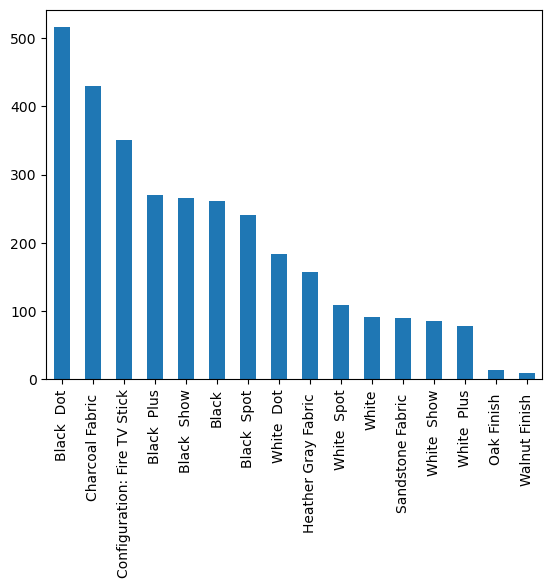

In [46]:
df['variation'].value_counts().plot.bar()

In [57]:
reviews = df['verified_reviews']

In [65]:
import re
import string

def clean_text_round1(text):
    
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('w*\d\w*','',text)
    return text

round1 = lambda x: clean_text_round1(x)

In [66]:
df_clean = pd.DataFrame(reviews.apply(round1))
df_clean

,verified_reviews
date,
31-Jul-18,love my echo
31-Jul-18,loved it
31-Jul-18,sometimes while playing a game you can answer ...
31-Jul-18,i have had a lot of fun with this thing my yr...
31-Jul-18,music
...,...
30-Jul-18,perfect for kids adults and everyone in between
30-Jul-18,listening to music searching locations checkin...
30-Jul-18,i do love these things i have them running my ...


In [70]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')
df_cv = cv.fit_transform(df_clean.verified_reviews)
df_dtm = pd.DataFrame(df_cv.toarray(), columns=cv.get_feature_names())
df_dtm.index = df_clean.index
df_dtm

,abay,abc,abd,abilities,ability,able,abode,absolutely,absolutly,ac,...,yr,yrs,yup,zero,zigbee,zonkedout,zwave,zzzz,zzzzzzz,útil
date,,,,,,,,,,,,,,,,,,,,,
31-Jul-18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31-Jul-18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31-Jul-18,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31-Jul-18,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
31-Jul-18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30-Jul-18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30-Jul-18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30-Jul-18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
df_dtm.transpose()

date,31-Jul-18,31-Jul-18,31-Jul-18,31-Jul-18,31-Jul-18,31-Jul-18,31-Jul-18,31-Jul-18,30-Jul-18,30-Jul-18,...,30-Jul-18,30-Jul-18,30-Jul-18,30-Jul-18,30-Jul-18,30-Jul-18,30-Jul-18,30-Jul-18,30-Jul-18,29-Jul-18
abay,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abc,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abd,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abilities,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ability,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zonkedout,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zwave,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zzzz,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zzzzzzz,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
